In [70]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from gvit.quadtree import FixedQuadTree

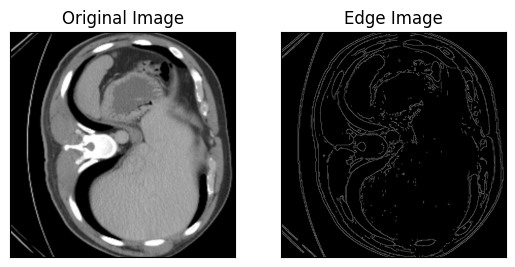

In [71]:
img = cv.imread('./dataset/exp/btcv/input.png')
img = cv.resize(img, (1024,1024))

grey_img = cv.GaussianBlur(img, (3,3),0)
edges = cv.Canny(grey_img, 50, 70)

plt.subplot(121),plt.imshow(grey_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.savefig(fname="paip_canny.jpg")
plt.show()

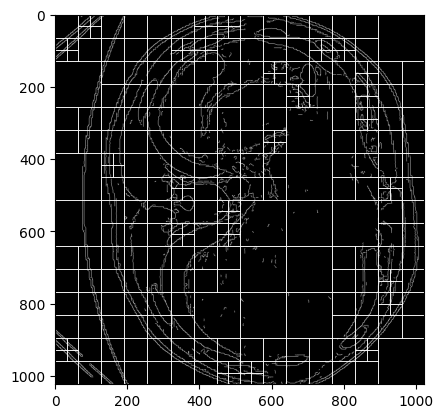

289


In [72]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')

qdt = FixedQuadTree(domain=edges, fixed_length=289)
qdt.draw(ax=ax)
plt.savefig(fname="btcv_pachify.jpg")
plt.show()

print(qdt.count_patches())

plt.close()

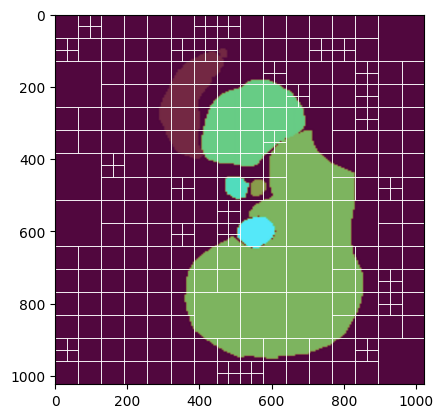

In [73]:
mask = cv.imread('./dataset/exp/btcv/mask.png')
mask = cv.resize(mask, (1024,1024))
fig, ax = plt.subplots()
ax.imshow(mask, cmap = 'gray')
qdt.draw(ax=ax)
plt.savefig(fname="btcv_mask_pachify.jpg")
plt.show()
plt.close()

In [74]:

mask[0][0]

array([81,  7, 62], dtype=uint8)

In [75]:
def patchify(mask):
    seq = qdt.serialize(mask)
    return seq

def depatchify(seq):
    mask = np.zeros(shape=(1024, 1024, 3))
    mask = qdt.deserialize(seq, mask=mask)
    return mask


In [76]:
seq = patchify(mask=mask)
len(seq)

289

In [77]:
seq[0].shape

(8, 8, 3)

In [78]:
mask=depatchify(seq=seq)
mask = mask.astype(np.uint8)
mask[0][0]


array([81,  7, 62], dtype=uint8)

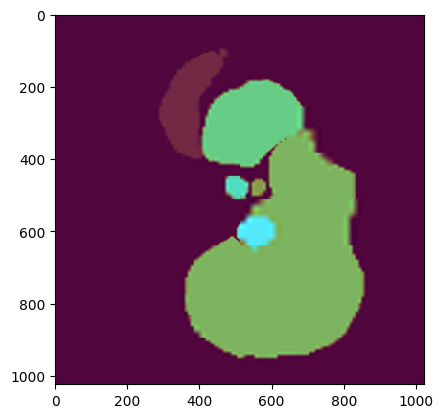

In [69]:
fig, ax = plt.subplots()
ax.imshow(mask, cmap = 'gray')
plt.savefig(fname="btcv_mask_depachify.jpg")
plt.show()
plt.close()